<a href="https://colab.research.google.com/github/shimul1725/Data-Science-Project-on-Time-Series/blob/main/Data_Science_Project_on_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("fremont-bridge.csv")
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0
2,2012-10-03T02:00:00.000,2.0,1.0,1.0
3,2012-10-03T03:00:00.000,5.0,2.0,3.0
4,2012-10-03T04:00:00.000,7.0,6.0,1.0


In [93]:
data = data.rename(columns={"Fremont Bridge West Sidewalk": "West", "Fremont Bridge East Sidewalk": "East","Fremont Bridge Total": "Total"})
data["Total"] = data["West"] + data["East"]
data.head()

,Date,Total,East,West
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0
2,2012-10-03T02:00:00.000,2.0,1.0,1.0
3,2012-10-03T03:00:00.000,5.0,2.0,3.0
4,2012-10-03T04:00:00.000,7.0,6.0,1.0


In [94]:
#let’s take a look at the summary statistics for this data:
data.dropna().describe()

,Total,East,West
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276
std,145.686289,67.739036,90.417584
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,74.000000
max,1097.000000,698.000000,850.000000


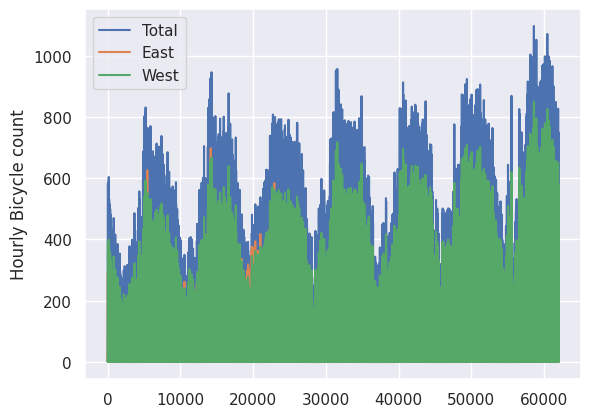

In [95]:
#Let’s start by plotting the raw data:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

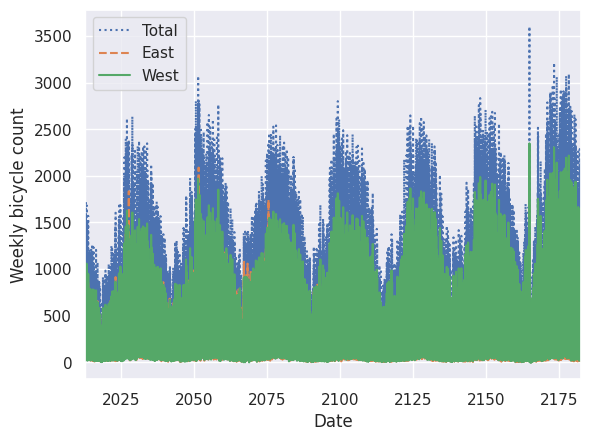

In [99]:
# Assuming your DataFrame is named 'data' and doesn't have a date column
data['Date'] = pd.date_range(start='2012-10-03', periods=len(data), freq='D')
data.set_index('Date', inplace=True)

# Resample the data on a weekly basis and calculate the sum
weekly = data.resample('W').sum()

# Plot the weekly data
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()


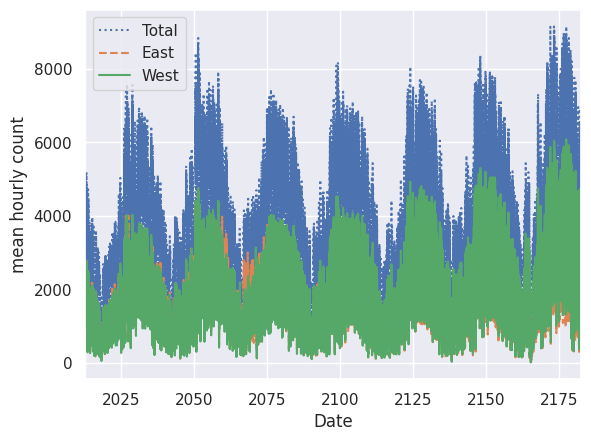

In [100]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

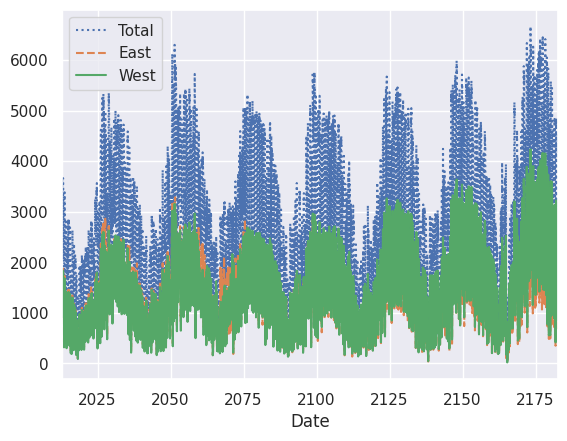

In [101]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

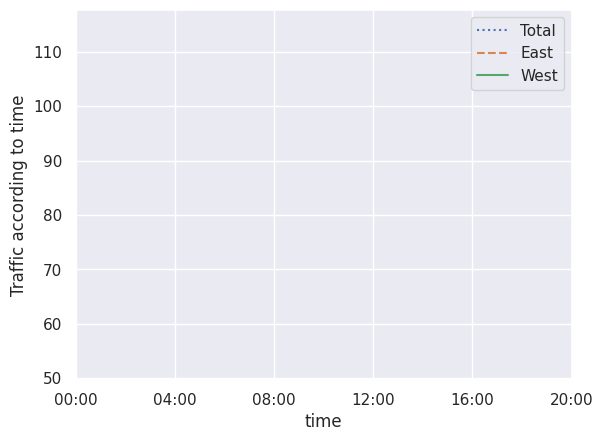

In [103]:
#Digging into the data
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()